In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)

In [3]:
ps = pd.read_csv('../data/post_secondary.csv')

In [4]:
ps.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
ps.head()

literacy_home  risk_factors  aspired_occ_b  math_b  reading_b  math_conf_b  \
0            0.0           2.0           -1.0   52.11      59.53       -1.118   
1            3.0           0.0            9.0   57.65      56.70        1.533   
2            2.0           NaN           10.0   66.44      64.46       -0.154   
3            1.0           NaN           10.0   44.68      48.69        1.030   
4            1.0           2.0           16.0   40.57      33.53        0.121   

   verbal_confidence  writing  sports  by_xcurr  homework  hedonics_b  \
0             -0.633    1.191     0.0       1.0       7.0         NaN   
1              0.331    1.191     0.0       3.0       5.0         4.0   
2             -0.933    0.996     0.0       2.0       NaN         1.0   
3              1.146   -0.137     1.0       0.0      11.0         NaN   
4              0.143   -0.435     0.0       0.0      10.0         4.0   

   hours_working_b  edu_confidence  aspired_occ_1  math_1  math_status_1  \
0              6.0             3.0            7.0   49.60            5.0   
1              0.0             8.0           10.0   60.64            6.0   
2              0.0             6.0            NaN   64.26            6.0   
3              0.0             6.0           -1.0   45.59            4.0   
4              3.0             7.0           16.0   38.79            5.0   

   hs_gpa  f1_xcurr  hours_working_1  hedonics_1  math_conf_1  hs_ac_load  \
0     1.0       6.0              3.0      -0.258         31.0         2.0   
1     2.0       1.0              2.0       0.528         31.0         4.0   
2     2.0       0.0              2.0      -0.215         30.0         4.0   
3     1.0       5.0              NaN       0.238         32.0         4.0   
4     0.0       6.0              1.0       1.024         32.0         4.0   

   ps_level  graduated_Y  effort  testing  v_facility  m_facility  academic_p  \
0       2.0          0.0     9.0   161.24       59.53      248.00         9.0   
1       1.0          1.0     9.0   174.99      226.80      363.84        18.0   
2       1.0          1.0     NaN   195.16      193.38      385.56         NaN   
3       2.0          0.0    15.0   138.96       97.38      182.36        15.0   
4       2.0          0.0    14.0   112.89       67.06      193.95         0.0   

   iq_by_concientiousness  delinquency  wages_cont  
0                 2767.77          NaN    644960.0  
1                 5315.76        0.000    524970.0  
2                     NaN          NaN   7220920.0  
3                 4196.10          NaN    208440.0  
4                 3654.14       10.048   5418720.0

reading in the data and defining functions to do the process the data for exploration

In [6]:
def KNNimpute_DF(df):
    #filling in missing values with knn imputer
    imputer_knn = KNNImputer(n_neighbors = 10)
    imputer_knn.fit(df)

    x = imputer_knn.transform(df)
    
    #casting the numpy array to dataframe
    df = pd.DataFrame(x)
    return df

In [7]:
def round_ordinals(x):
    ordinal_feature_list = ['literacy_home','risk_factors','aspired_occ_b','sports','by_xcurr',
                    'homework','hedonics_b','hours_working_b','edu_confidence',
                    'aspired_occ_1','math_status_1','hs_gpa','f1_xcurr','hours_working_1',
                    'hedonics_1','hs_ac_load', 'testing','academic_p','graduated_Y']
    
    for k in ordinal_feature_list:
        x[k] = x.loc[:,k].apply(round)
    return x

In [8]:
def create_exploratory_set(df):   
    z = KNNimpute_DF(df)  
    rename_list = list(df.columns)
    z.columns = rename_list
    round_ordinals(z)    
    return z

creating exporatory dataset

In [9]:
exp = create_exploratory_set(ps)

In [10]:
exp.head()

literacy_home  risk_factors  aspired_occ_b  math_b  reading_b  math_conf_b  \
0              0             2             -1   52.11      59.53       -1.118   
1              3             0              9   57.65      56.70        1.533   
2              2             1             10   66.44      64.46       -0.154   
3              1             1             10   44.68      48.69        1.030   
4              1             2             16   40.57      33.53        0.121   

   verbal_confidence  writing  sports  by_xcurr  homework  hedonics_b  \
0             -0.633    1.191       0         1         7           2   
1              0.331    1.191       0         3         5           4   
2             -0.933    0.996       0         2        18           1   
3              1.146   -0.137       1         0        11           4   
4              0.143   -0.435       0         0        10           4   

   hours_working_b  edu_confidence  aspired_occ_1  math_1  math_status_1  \
0                6               3              7   49.60              5   
1                0               8             10   60.64              6   
2                0               6             10   64.26              6   
3                0               6             -1   45.59              4   
4                3               7             16   38.79              5   

   hs_gpa  f1_xcurr  hours_working_1  hedonics_1  math_conf_1  hs_ac_load  \
0       1         6                3           0         31.0           2   
1       2         1                2           1         31.0           4   
2       2         0                2           0         30.0           4   
3       1         5                3           0         32.0           4   
4       0         6                1           1         32.0           4   

   ps_level  graduated_Y  effort  testing  v_facility  m_facility  academic_p  \
0       2.0            0     9.0      161       59.53      248.00           9   
1       1.0            1     9.0      175      226.80      363.84          18   
2       1.0            1    20.7      195      193.38      385.56          50   
3       2.0            0    15.0      139       97.38      182.36          15   
4       2.0            0    14.0      113       67.06      193.95           0   

   iq_by_concientiousness  delinquency  wages_cont  
0                2767.770       6.9930    644960.0  
1                5315.760       0.0000    524970.0  
2               10861.843       1.6225   7220920.0  
3                4196.100       2.5013    208440.0  
4                3654.140      10.0480   5418720.0

In [11]:
exp.describe()

literacy_home  risk_factors  aspired_occ_b       math_b    reading_b  \
count    9901.000000   9901.000000    9901.000000  9901.000000  9901.000000   
mean        2.291284      0.801131       6.357439    53.078939    52.879749   
std         0.793912      0.879361       5.089522     9.159531     9.187201   
min         0.000000      0.000000      -1.000000    19.380000    24.910000   
25%         2.000000      0.000000      -1.000000    47.180000    46.840000   
50%         2.000000      1.000000       9.000000    53.090000    52.880000   
75%         3.000000      1.000000      10.000000    59.360000    59.160000   
max         3.000000      5.000000      17.000000    86.680000    78.760000   

       math_conf_b  verbal_confidence      writing       sports     by_xcurr  \
count  9901.000000        9901.000000  9901.000000  9901.000000  9901.000000   
mean      0.091602           0.084466     0.246393     1.123725     1.106252   
std       0.851322           0.825361     0.850615     1.194239     1.249494   
min      -1.831000          -2.197000    -1.847000     0.000000     0.000000   
25%      -0.502300          -0.418000    -0.216000     0.000000     0.000000   
50%       0.068000           0.088348     0.247000     1.000000     1.000000   
75%       0.571000           0.504800     0.812000     2.000000     2.000000   
max       1.772000           1.596000     1.951000     7.000000     8.000000   

          homework   hedonics_b  hours_working_b  edu_confidence  \
count  9901.000000  9901.000000      9901.000000     9901.000000   
mean     10.400566     3.337441         1.009898        6.472377   
std       7.089453     2.101794         1.599527        1.354666   
min       0.000000     0.000000         0.000000        1.000000   
25%       5.000000     2.000000         0.000000        6.000000   
50%       9.000000     3.000000         0.000000        6.000000   
75%      14.000000     4.000000         1.000000        7.000000   
max      45.000000     8.000000         9.000000        9.000000   

       aspired_occ_1       math_1  math_status_1       hs_gpa     f1_xcurr  \
count    9901.000000  9901.000000    9901.000000  9901.000000  9901.000000   
mean        6.937683    52.443508       5.293405     2.261792     2.845268   
std         5.525556     9.448986       0.982609     1.629446     2.360169   
min        -1.000000    20.680000       1.000000     0.000000     0.000000   
25%        -1.000000    46.080000       5.000000     1.000000     0.000000   
50%         9.000000    52.443508       6.000000     2.000000     3.000000   
75%        10.000000    59.270000       6.000000     3.000000     4.000000   
max        17.000000    79.850000       6.000000     6.000000     9.000000   

       hours_working_1   hedonics_1  math_conf_1   hs_ac_load     ps_level  \
count      9901.000000  9901.000000  9901.000000  9901.000000  9901.000000   
mean          2.934047     0.055550    25.530738     4.353096     1.397841   
std           1.779284     1.006115     3.866370     1.284310     0.540246   
min           0.000000    -2.000000     6.000000     0.000000     1.000000   
25%           2.000000    -1.000000    24.000000     4.000000     1.000000   
50%           3.000000     0.000000    26.000000     4.000000     1.000000   
75%           4.000000     1.000000    28.000000     5.000000     2.000000   
max           8.000000     2.000000    34.000000     6.000000     3.000000   

       graduated_Y       effort      testing   v_facility   m_facility  \
count   9901.00000  9901.000000  9901.000000  9901.000000  9901.000000   
mean       0.55156    14.759404   158.392991   178.374466   283.374735   
std        0.49736     7.238949    25.522788    54.478854    85.053664   
min        0.00000     0.000000    74.000000    26.140000    26.530000   
25%        0.00000     9.000000   142.000000   146.070000   228.200000   
50%        1.00000    14.000000   159.000000   179.077892   288.720000   
75%        1.00000    18.100000   176

In [12]:
exp.graduated_Y.value_counts(normalize = True)

1    0.55156
0    0.44844
Name: graduated_Y, dtype: float64

the class balance of studentsk that graduated from some kind of post secondary program is close.  Note this 'graduated_Y' is not students that graduate from a 4 yr college, but students that graduated from a 4 yr college, community college, or a trade school.  Next I subset post secondary cohorts and then further subset into graduation status.

In [13]:
coll_t = exp[exp.ps_level == 1]
coll_y = coll_t[(coll_t.graduated_Y == 1)]
coll_n = coll_t[(coll_t.graduated_Y == 0)]

comm_t = exp[exp.ps_level == 2]
comm_y = comm_t[(comm_t.graduated_Y == 1)]
comm_n = comm_t[(comm_t.graduated_Y == 0)]

trade_t = exp[exp.ps_level == 3]
trade_y = trade_t[(trade_t.graduated_Y == 1)]
trade_n = trade_t[(trade_t.graduated_Y == 0)]

print(f' 4 yr college graduated: {coll_y.shape[0]}, dropped out: {coll_n.shape[0]}, grads/non-grads: {round(coll_y.shape[0]/coll_n.shape[0],2)}\n',
      f'community college graduated: {comm_y.shape[0]}, dropped out:{comm_n.shape[0]}, grads/non-grads: {round(comm_y.shape[0]/comm_n.shape[0],2)}\n',
      f'trade school graduated: {trade_y.shape[0]}, dropped out:  {trade_n.shape[0]}, grads/non-grads: {round(trade_y.shape[0]/trade_y.shape[0],2)}\n')


 4 yr college graduated: 3714, dropped out: 2377, grads/non-grads: 1.56
 community college graduated: 1324, dropped out:1926, grads/non-grads: 0.69
 trade school graduated: 154, dropped out:  137, grads/non-grads: 1.0



surprised to see that the ratio of community college graduatess to non-graduates is less than one.

In [14]:
print(f'standardized testing mean entire 4yr collge cohort is: {round(coll_t.testing.mean(),2)}')
print(f'standardized testing mean for collge graduates is:  {round(coll_y.testing.mean(),2)}')
print(f'standardized testing mean for collge dropouts is:  {round(coll_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire community collge cohort is:  {round(comm_t.testing.mean(),2)}')
print(f'standardized testing mean for community collge graduates is: {round(comm_y.testing.mean(),2)}')
print(f'standardized testing mean for community collge dropouts is:  {round(comm_n.testing.mean(),2)}\n')

print(f'standardized testing mean for the entire trade school cohort graduates is: {round(trade_t.testing.mean(),2)}')
print(f'standardized testing mean for trade school graduates is:  {round(trade_y.testing.mean(),2)}')
print(f'standardized testing mean for trade school dropouts is: {round(trade_n.testing.mean(),2)}\n')


standardized testing mean entire 4yr collge cohort is: 167.05
standardized testing mean for collge graduates is:  169.97
standardized testing mean for collge dropouts is:  162.48

standardized testing mean for the entire community collge cohort is:  144.5
standardized testing mean for community collge graduates is: 146.47
standardized testing mean for community collge dropouts is:  143.15

standardized testing mean for the entire trade school cohort graduates is: 132.75
standardized testing mean for trade school graduates is:  132.79
standardized testing mean for trade school dropouts is: 132.7



In [15]:
print(f'standardized testing mean for the whole dataset {round(exp.testing.std(),2)}')

standardized testing mean for the whole dataset 25.52


surprised to an almost full standard deviation difference between college and community college cohorts.

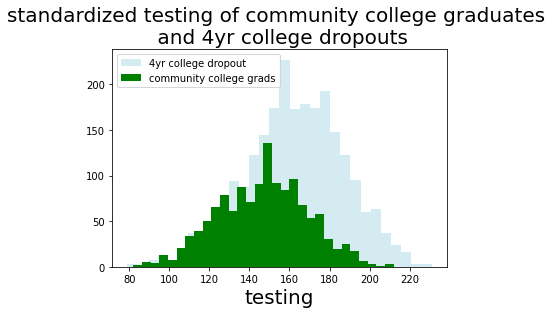

In [16]:
plt.hist(coll_n.testing, alpha=.5, bins=30, color='lightblue')
plt.hist(comm_y.testing, alpha= 1, bins=30, color='green')
plt.title('standardized testing of commuity collegs graduates vs dropouts')
plt.xlabel('testing', size = 20)
plt.savefig('testing2.png', bbox_inches='tight')
plt.title('standardized testing of community college graduates \n and 4yr college dropouts', size = 20)
plt.legend(['4yr college dropout','community college grads'], loc = 2)
plt.show()

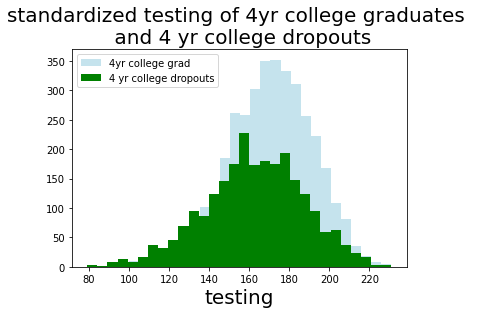

In [17]:
plt.hist(coll_y.testing, alpha = .7, bins=30, color='lightblue')
plt.hist(coll_n.testing, alpha = 1, bins=30, color='green')
plt.xlabel('testing', size = 20)
#plt.savefig('testing2.png', bbox_inches='tight')
plt.title('standardized testing of 4yr college graduates \n and 4 yr college dropouts', size = 20)
plt.legend(['4yr college grad','4 yr college dropouts'])
plt.show()

In [18]:
print(f'mean wages for 4yr college graduates: {round(coll_y.wages_cont.mean())}')
print(f'mean wages for 4yr college drop outs: {round(coll_n.wages_cont.mean())}')
print(f'mean wages for commmunity college graduates: {round(comm_y.wages_cont.mean())}')
print(f'mean wages for community college drop outs: {round(comm_n.wages_cont.mean())}')

mean wages for 4yr college graduates: 5844351.0
mean wages for 4yr college drop outs: 4007892.0
mean wages for commmunity college graduates: 3919831.0
mean wages for community college drop outs: 3097513.0


Note that these quantities are not in dollars as 'wages_cont' is wage data multiplied by standardized testing. Surprising to see community college graduates making comparable wages to 4 yr college drop outs.

In [19]:
plt.style.use('seaborn-ticks')
sns.set_style("white")

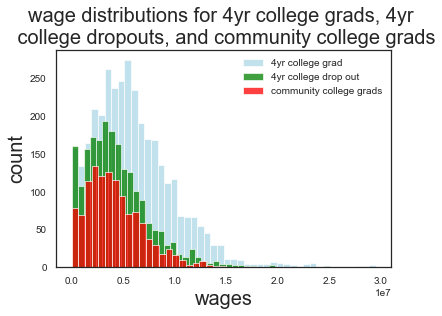

In [20]:
p = coll_y[(coll_y.wages_cont > 0) & (coll_y.wages_cont < 30000000)]
q = coll_n[(coll_n.wages_cont > 0) & (coll_n.wages_cont < 30000000)]
r = comm_y[(comm_y.wages_cont > 0) & (comm_y.wages_cont < 30000000)]

sns.histplot(p['wages_cont'],color = 'lightblue',label='4yr college grad')
sns.histplot(q['wages_cont'],color = 'green', label='4yr college drop out')
sns.histplot(r['wages_cont'], color = 'red',label='community college grad')
plt.title('wage distributions for 4yr college grads, 4yr \n college dropouts, and community college grads',size = 20)
plt.legend(['4yr college grad','4yr college drop out','community college grads'])
plt.xlabel('wages',size = 20)
plt.ylabel('count',size = 20)
plt.show()

wage distributions for 4yr college grad, 4yr college drop out, community college grads.  Note distributinos for communitys college grads and 4 yr college dropout are remarkably congruent.

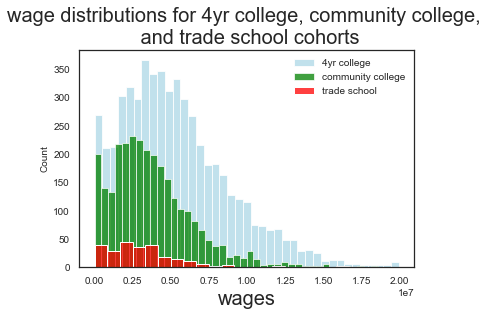

In [21]:
p = coll_t[(coll_t.wages_cont > 0) & (coll_t.wages_cont < 20000000)]
q = comm_t[(comm_t.wages_cont > 0) & (comm_t.wages_cont < 20000000)]
r = trade_t[(trade_t.wages_cont > 0) & (trade_t.wages_cont < 20000000)]

sns.histplot(p['wages_cont'],  color = 'lightblue',label='4yr college grad')
sns.histplot(q['wages_cont'],  color = 'green', label='4yr college drop out')
sns.histplot(r['wages_cont'],  color = 'red',label='community college grad')
plt.title('wage distributions for 4yr college, community college, \n and trade school cohorts', size = 20)
plt.legend(['4yr college','community college','trade school'])
plt.xlabel('wages',size = 20)
plt.show()

differences between post secondary program groupings

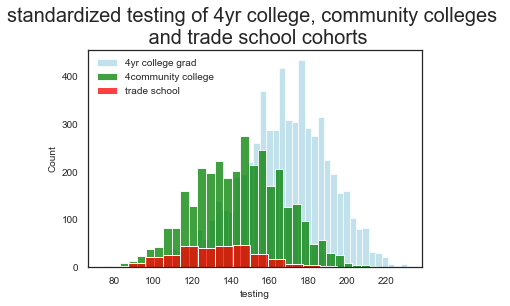

In [22]:
p = coll_t[coll_t.testing > 0]
q = comm_t[comm_t.testing > 0]
r = trade_t[trade_t.testing > 0]
sns.histplot(p['testing'],  color = 'lightblue',label='yes')
sns.histplot(q['testing'],  color = 'green', label='tot')
sns.histplot(r['testing'],  color = 'red',label='no')
plt.title('standardized testing of 4yr college, community colleges \n and trade school cohorts', size = 20)
plt.legend(['4yr college grad','4community college','trade school'])
plt.show()

standardized testing differences among post secondary cohorts more severe than expected.  

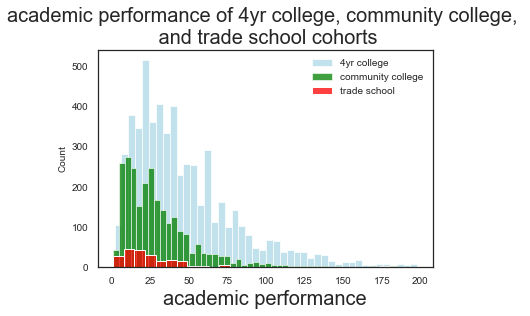

In [23]:
p = comm_t[(comm_t.academic_p > 0) & (comm_t.academic_p < 200)]
q = coll_t[(coll_t.academic_p > 0) & (coll_t.academic_p < 200)]
r = trade_t[(trade_t.academic_p > 0) & (trade_t.academic_p < 200)]

sns.histplot(q['academic_p'],  color = 'lightblue', label='tot')
sns.histplot(p['academic_p'],  color = 'green',label='yes')
sns.histplot(r['academic_p'],  color = 'red',label='no')
plt.title('academic performance of 4yr college, community college, \n and trade school cohorts',size = 20 )
plt.legend(['4yr college', 'community college','trade school'])
plt.xlabel('academic performance',size = 20)
plt.show()

academic performance between cohorts

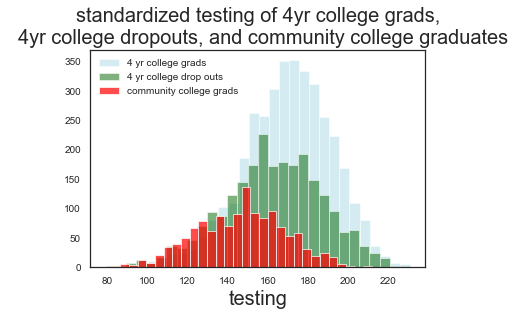

In [24]:
plt.hist(coll_y.testing, alpha=0.5, bins=30, color='lightblue')
plt.hist(coll_n.testing, alpha=0.5, bins=30, color='darkgreen')
plt.hist(comm_y.testing, alpha=.7, bins=30, color='red')

plt.title('standardized testing of 4yr college grads,\n  4yr college dropouts, and community college graduates', size = 20)
plt.xlabel('testing', size = 20 )
#plt.savefig('testing2.png', bbox_inches='tight')
plt.legend(['4 yr college grads', '4 yr college drop outs','community college grads'])
plt.show()

test score between college grads and drop outs too close to be useful in classification modelling.

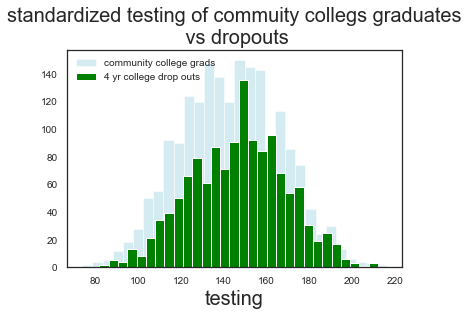

In [25]:
plt.hist(comm_n.testing, alpha=.5, bins=30, color='lightblue')
plt.hist(comm_y.testing, alpha=1, bins=30, color='green')
plt.title('standardized testing of commuity collegs graduates\n vs dropouts', size = 20)
plt.xlabel('testing', size = 20)
#plt.savefig('testing2.png', bbox_inches='tight')
plt.legend(['community college grads', '4 yr college drop outs'], loc = 2)
plt.show()

standardized testing of community college graduates and drop outs

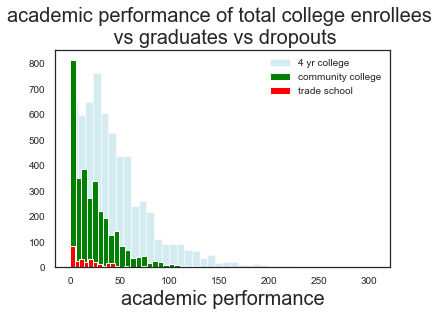

In [26]:
plt.hist(coll_t.academic_p, alpha= .5, bins=40, color='lightblue')
plt.hist(comm_t.academic_p, alpha= 1, bins=40, color='green')
plt.hist(trade_t.academic_p, alpha= 1, bins=40, color='red')
plt.title('academic performance of total college enrollees \n vs graduates vs dropouts', size = 20)
plt.xlabel('academic performance', size = 20)
#plt.savefig('academics.png', bbox_inches='tight')
plt.legend(['4 yr college','community college','trade school'])
plt.show()

comparisons of academic performance

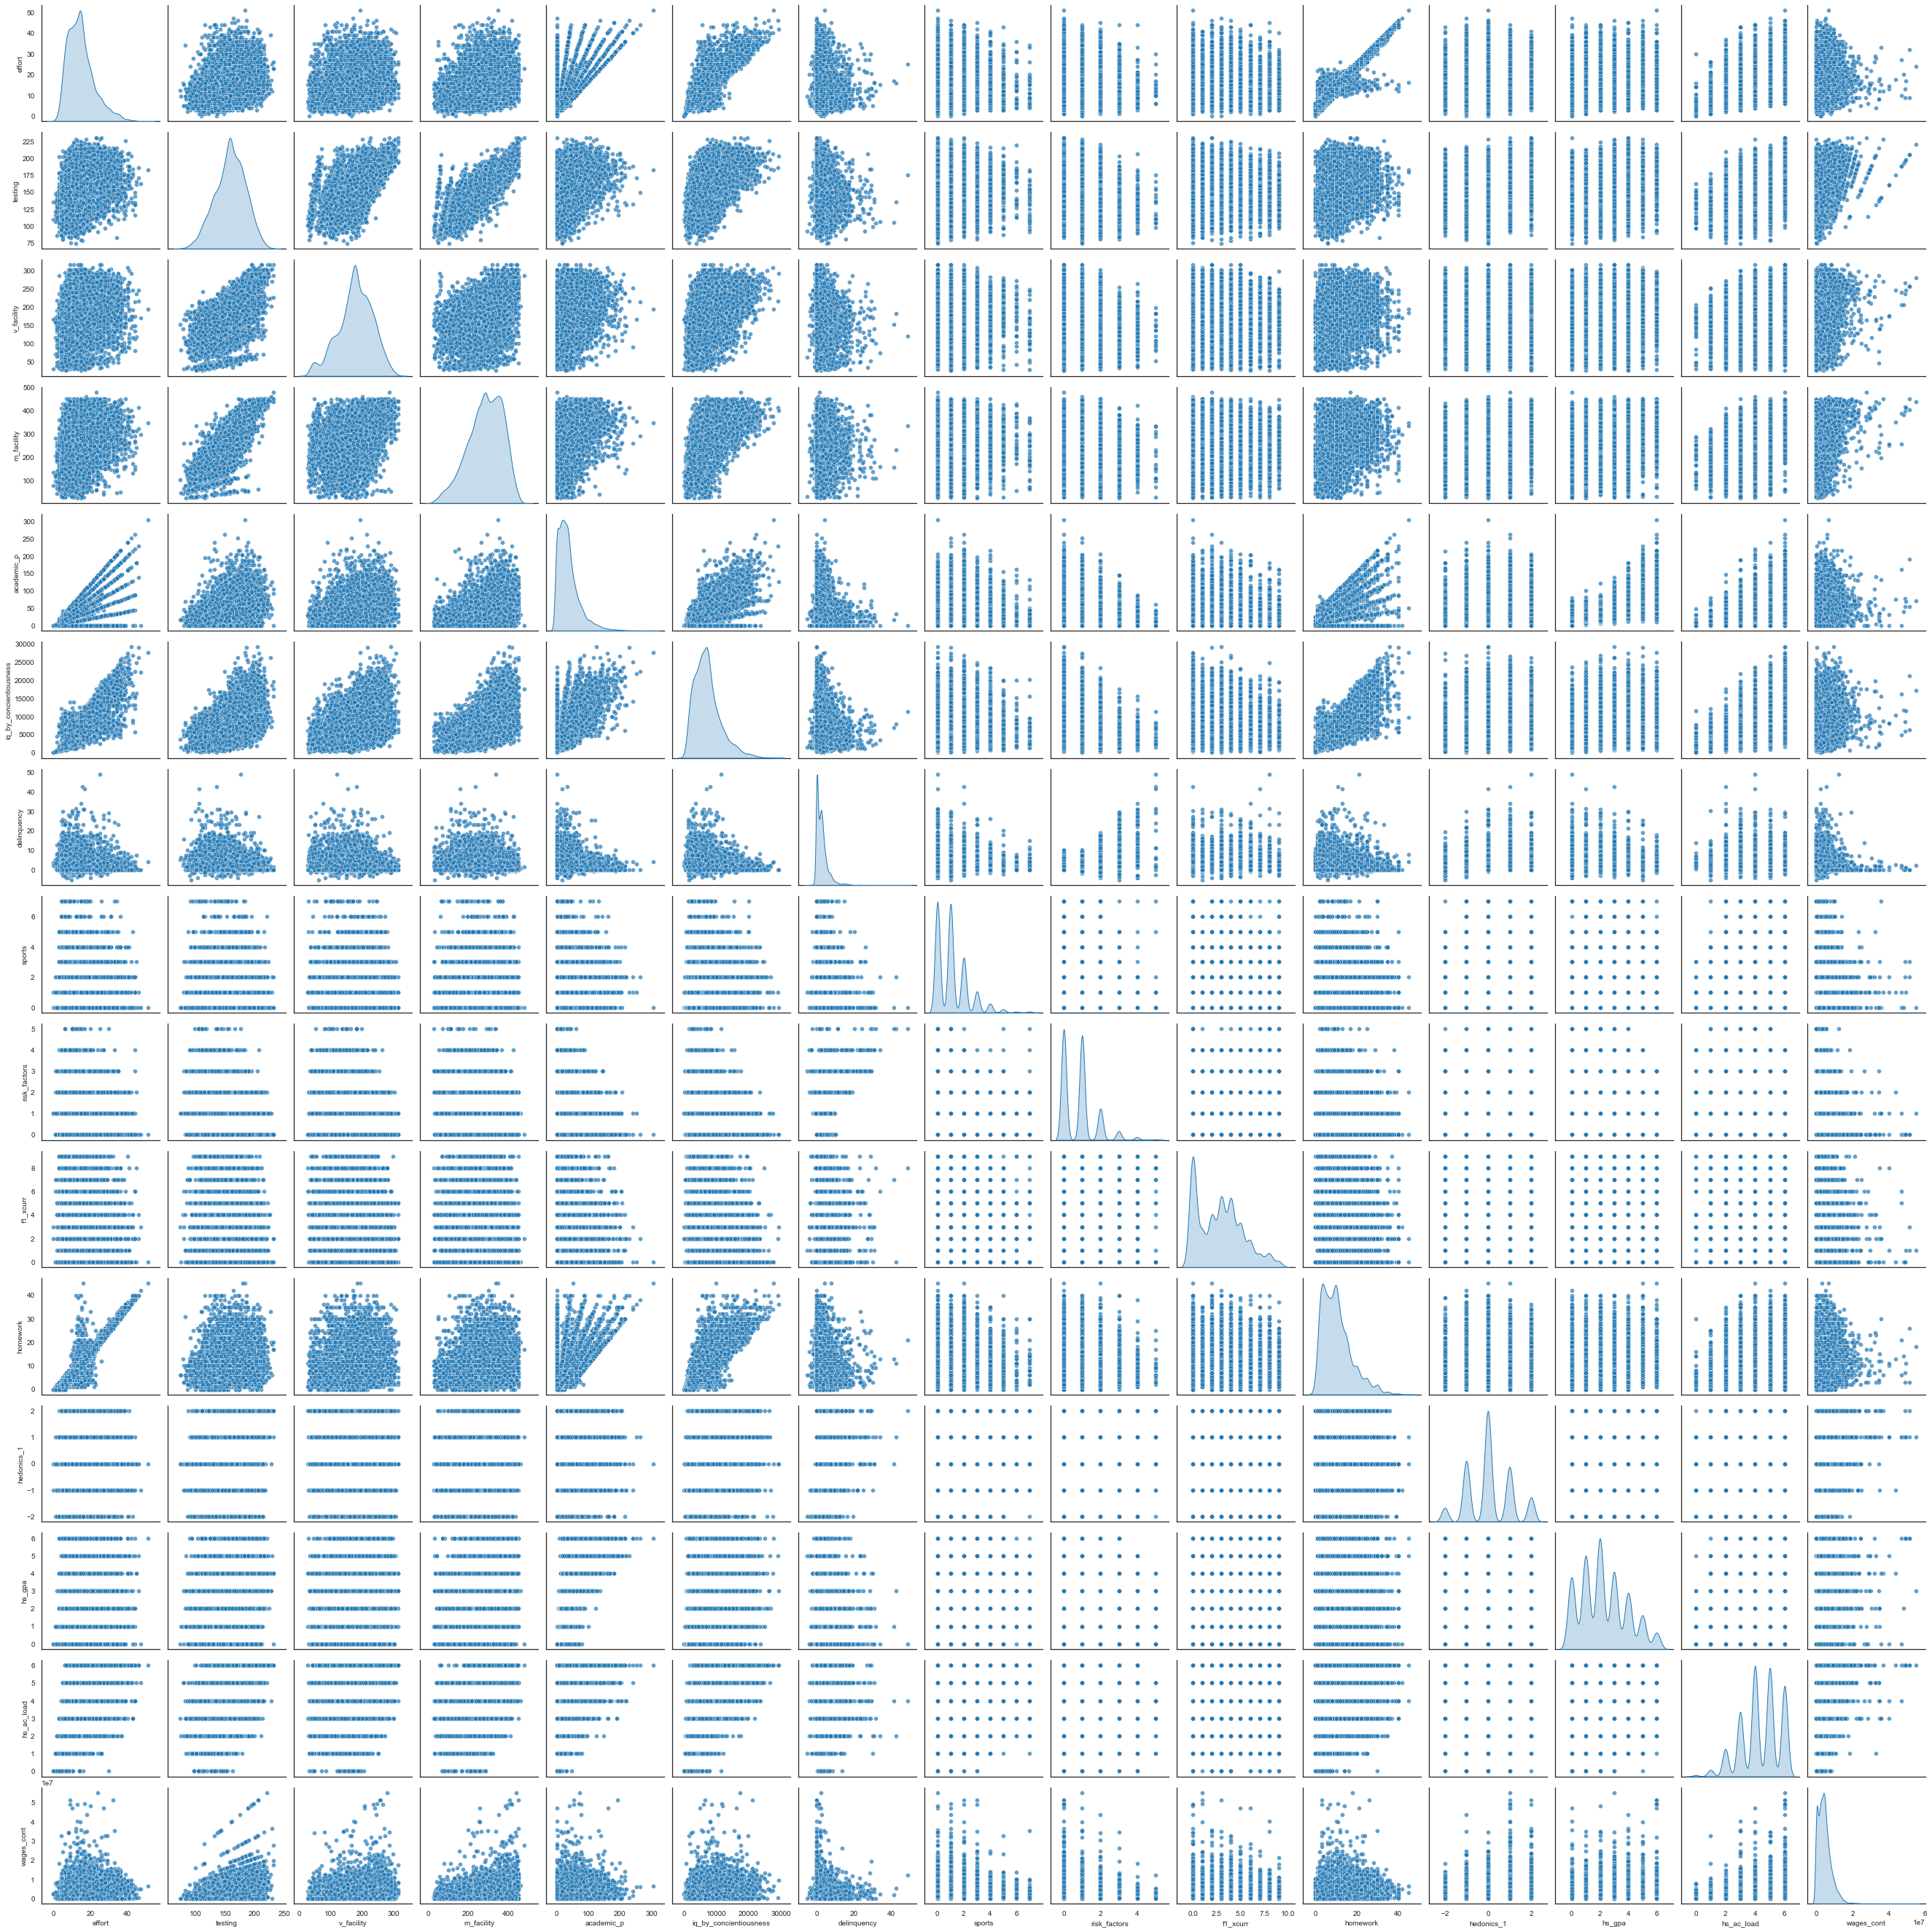

In [170]:
features = exp[[ 'effort', 'testing', 'v_facility',
       'm_facility', 'academic_p', 'iq_by_concientiousness',
                'delinquency','sports','risk_factors','f1_xcurr','homework',
                'hedonics_1','hs_gpa','hs_ac_load','wages_cont']]

sns.pairplot(features, diag_kind = 'kde', palette= 'coolwarm', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

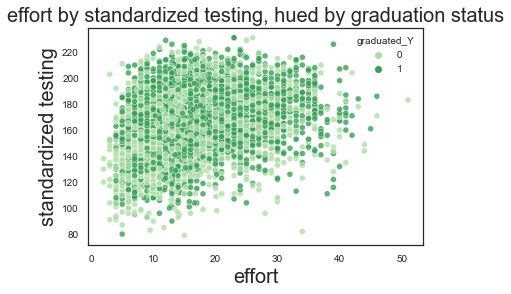

In [27]:
sns.scatterplot(x = 'effort',
                y = 'testing',
                data = coll_t,
                alpha = .8,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
plt.xlabel('effort', size = 20)
plt.ylabel('standardized testing', size = 20)
plt.title('effort by standardized testing, hued by graduation status', size = 20)
plt.savefig('scatterwages.png', bbox_inches='tight')
plt.show()

note that darker green is distributed more or less evenly indicating that 'effort' feature is not hugely relevant to graduation status, but higher levels of 'effort' have some relevance to standardized testing as indictated by plot

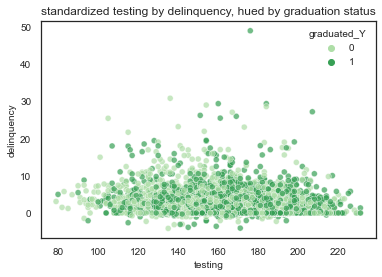

In [28]:
sns.scatterplot(x = 'testing', 
                y = 'delinquency',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.title('standardized testing by delinquency, hued by graduation status')
plt.show()

scatterplot of standardized testing and delinqunecy.  darker green indicates graduation from 4 yr college

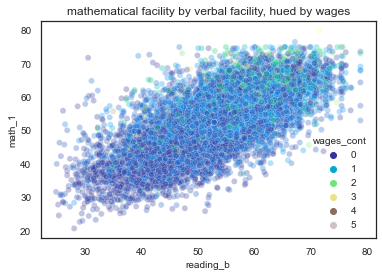

In [29]:
sns.scatterplot(x = 'reading_b', 
                y = 'math_1',
                data = exp,
                alpha = .3,
                hue = 'wages_cont',
                palette = 'terrain'           
               )
plt.title('mathematical facility by verbal facility, hued by wages')
plt.savefig('m_r_conf.png', bbox_inches='tight')
plt.show()

wages, verbal ability and mathematical ability positively correlated

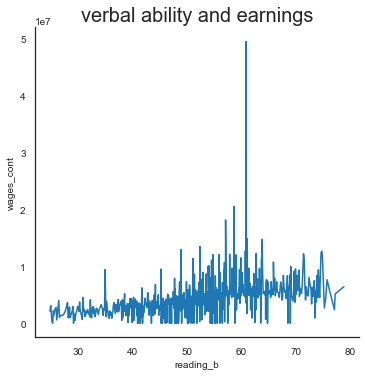

In [30]:
sns.relplot(x="reading_b", y="wages_cont", ci=None, kind="line", data=exp)
plt.title('verbal ability and earnings',size = 20)
plt.show()

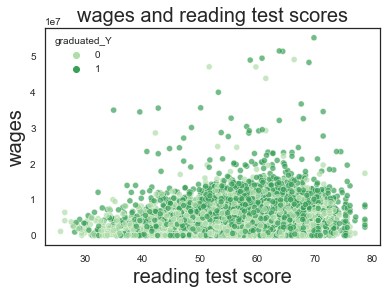

In [31]:
sns.scatterplot(x = 'reading_b', 
                y = 'wages_cont',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
#plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.xlabel('reading test score', size = 20)
plt.ylabel('wages', size = 20)
plt.title('wages and reading test scores', size = 20)
plt.show()

note wages that extreme ranges of mathematical ability vs verbal ability.   math ability seems to provide better prospects in terms of earnings than verbal.

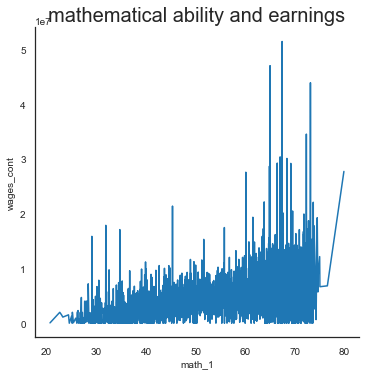

In [32]:
sns.relplot(x="math_1", y="wages_cont", ci=None, kind="line", data=exp)
plt.title('mathematical ability and earnings',size = 20)
plt.show()

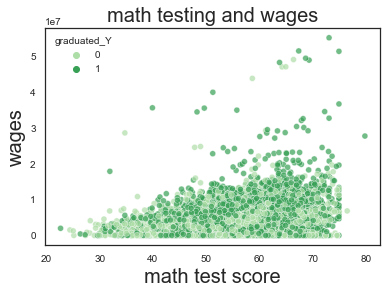

In [33]:
sns.scatterplot(x = 'math_1', 
                y = 'wages_cont',
                data = coll_t,
                alpha = .7,
                hue = 'graduated_Y',
                palette = 'Greens'
               )
#plt.savefig('dscatterwages.png', bbox_inches='tight')
plt.xlabel('math test score', size = 20)
plt.ylabel('wages', size = 20)
plt.title('math testing and wages', size = 20)
plt.show()

note more distinct upward slope to distribution.  

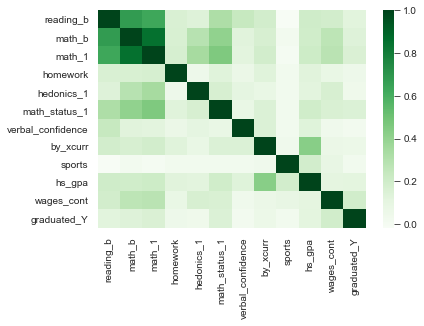

In [34]:
corr_features = coll_t[['reading_b','math_b','math_1','homework','hedonics_1','math_status_1',
                     'verbal_confidence','by_xcurr','sports','hs_gpa','wages_cont','graduated_Y']]

cor_matrix = corr_features.corr()
sns.heatmap(cor_matrix, cmap = 'Greens')
plt.show()

math and reading standardized test score highly correlated.  'hs_gpa', 'math_status','math_b','math_1','reading_b' higher correlation to 'graduation_Y"

In [35]:
def plotbar(x,y,data, save = False):
    sns.barplot(x = x,
            y = y,
            data = data,
            palette = 'Greens');
    if save == True:
        plt.savefig(f'{x}-{y}-{data}.png', bbox_inches='tight')  
    plt.show()
    return

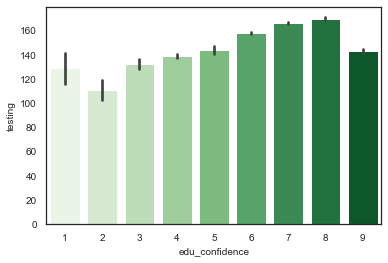

In [36]:
plotbar('edu_confidence','testing',exp)

positive relationship between educational confidence and standardized testing

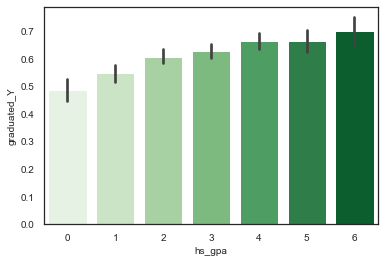

In [37]:
plotbar('hs_gpa','graduated_Y',coll_t)

relationship between hs_gpa and four year college graduation

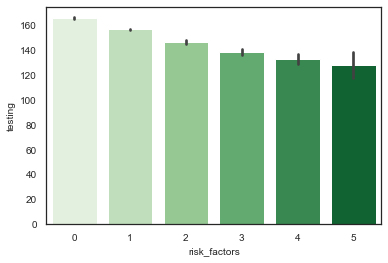

In [38]:
plotbar('risk_factors','testing',exp)

 risk factors and lower standardized testing related

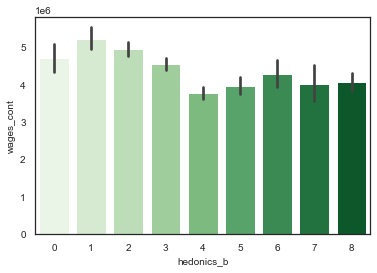

In [39]:
plotbar('hedonics_b','wages_cont',exp)

wages tend to be higher the less time spent on tv/movies/video games

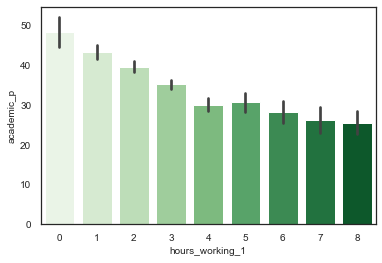

In [40]:
plotbar('hours_working_1','academic_p',exp)

hours spent working in high school obliterates academic performance

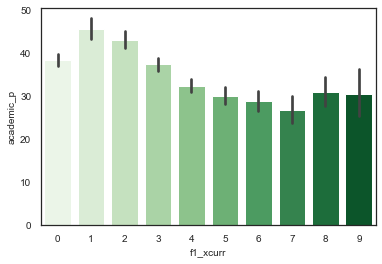

In [41]:
plotbar('f1_xcurr','academic_p',exp)

xtra curricular activites has a sweet spot at 1. perhaps '0' indicates some apathy while more extacurriculars than 1 tends to compromise performance.

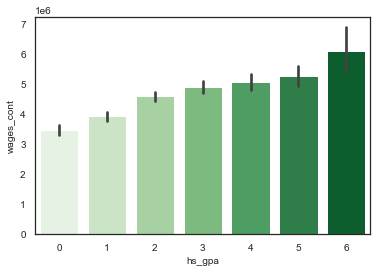

In [42]:
plotbar('hs_gpa','wages_cont', exp)

higher gpa, higher wages.  note higher bump in wage data at the extreme end of gpa.  

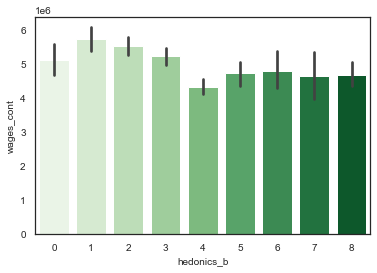

In [43]:
plotbar('hedonics_b','wages_cont', coll_t)

wages and hours spent on tv/movies/video games

In [44]:
exp.groupby('literacy_home').testing.mean()

literacy_home
0    144.129630
1    152.206039
2    155.207751
3    163.474453
Name: testing, dtype: float64

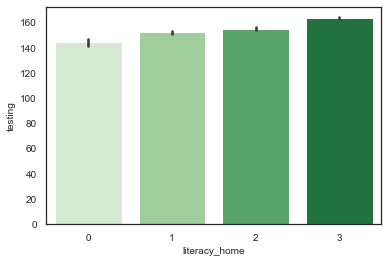

In [45]:
plotbar('literacy_home','testing',exp)

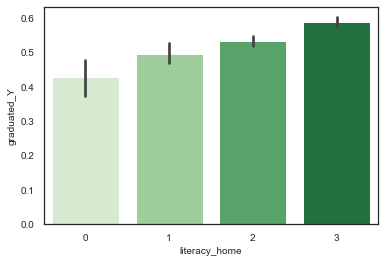

In [46]:
plotbar('literacy_home','graduated_Y',exp)

In [47]:
exp.literacy_home.value_counts()

3    4658
2    3793
1    1126
0     324
Name: literacy_home, dtype: int64

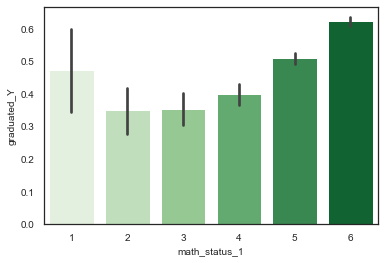

In [48]:
plotbar('math_status_1','graduated_Y',exp)

higher level of math classes complete in high school major benefit for college graduation and a major benefit for performance in wage earning

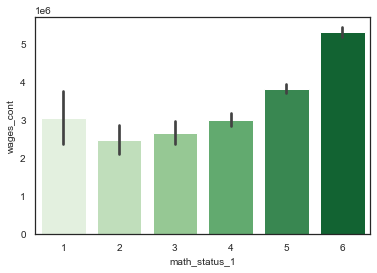

In [49]:
plotbar('math_status_1','wages_cont',exp)

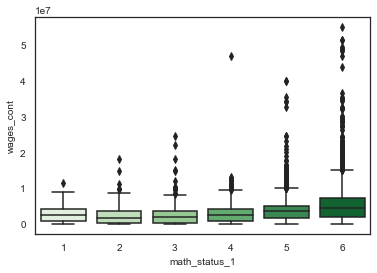

In [50]:
sns.boxplot(x = 'math_status_1', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

note high number of outliers with regard to high level of math class completion

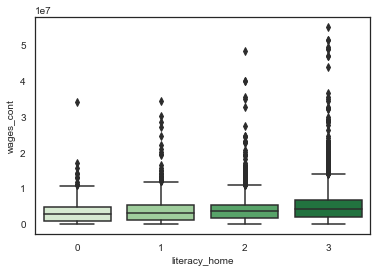

In [51]:
sns.boxplot(x = 'literacy_home', y = 'wages_cont',
           data = exp,
           palette = 'Greens')

plt.savefig('hedoneff.png', bbox_inches='tight')
plt.show()

a highly literate home environment tends to suggest higher economic performance as well.

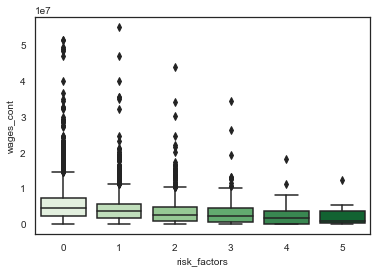

In [52]:
sns.boxplot(x = 'risk_factors', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.savefig('risk.png', bbox_inches='tight')
plt.show()

risk factors like broken home, poverty, low educaiton levels of parents, or frequent school changes suggest lower economic performance

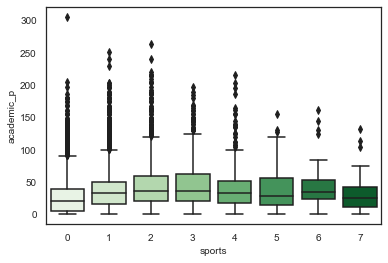

In [53]:
sns.boxplot(x = 'sports', y = 'academic_p',
           data = exp,
           palette = 'Greens')
plt.show()

sport seems to have a sweet spot around '2' for performing academically

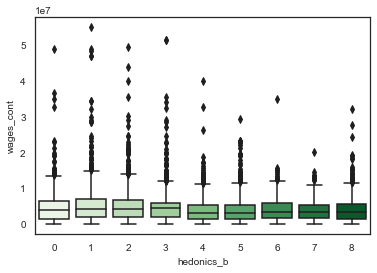

In [54]:
sns.boxplot(x = 'hedonics_b', y = 'wages_cont',
           data = exp,
           palette = 'Greens')
plt.show()

high levels of media usage tends to compromise earning outcomes.  what does the increased number of earnings outliers at '8' mean? 

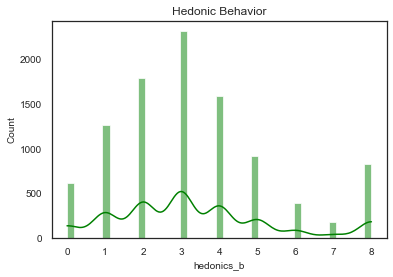

In [55]:
sns.histplot(exp.hedonics_b, color = 'green', kde = True)
plt.title('Hedonic Behavior')
plt.show()

are the increased outliers just an side effect of more people in that category?  poss.

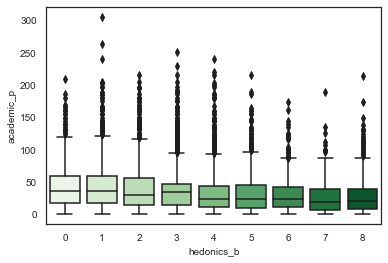

In [56]:
sns.boxplot(x = 'hedonics_b', y = 'academic_p',
           data = exp,
           palette = 'Greens')
plt.show()

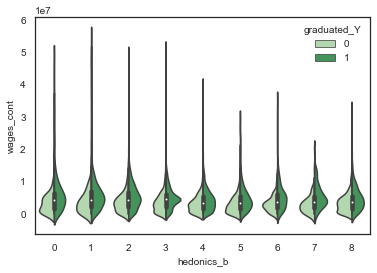

In [57]:
x = sns.violinplot(x="hedonics_b", y="wages_cont", hue="graduated_Y",
                    data=exp, palette="Greens", split=True)

notice increasing skewness at higher levels of hedonic behaviorfor graduates.  IQ become more of factor in graduation for more hedonically oriented students.

/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if sys.path[0] == '':
/Users/eonjamesslemp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


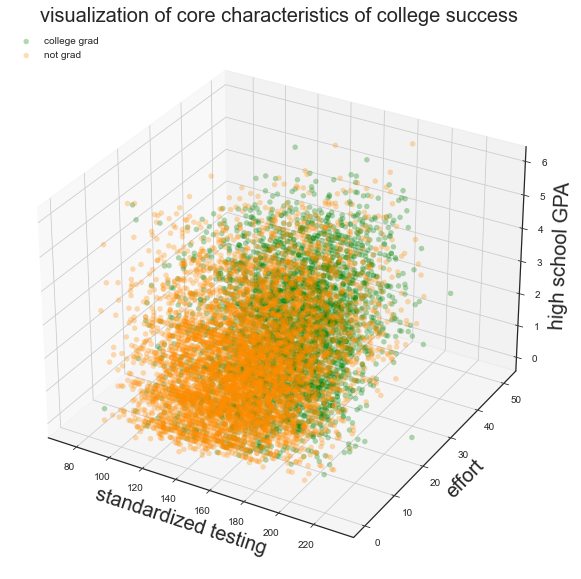

In [62]:
y_grad = exp[(exp.ps_level ==1) & (exp.graduated_Y == 1)]
n_grad = exp[(exp.ps_level !=1 ) | (exp.graduated_Y != 1)]

data = (y_grad, n_grad)
colors = ('green', 'darkorange')
groups = ('college grad', 'not grad') 

# Create plot
fig = plt.figure(figsize = (15, 10))

ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
# ax.set_proj_type('ortho')

for data, color, group in zip(data, colors, groups):
    x, y, z = data.testing, data.effort, data.hs_gpa
    ax.scatter(x, y, z, alpha=0.3, c=color, edgecolors='none', s=30, label=group)
# x, y, z = data.testing, data.effort, data.hs_ac_load
# ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30, label=group)


ax.set_xlabel('standardized testing',size = 20)
ax.set_ylabel('effort',size = 20)
ax.set_zlabel('high school GPA',size = 20)

# for angle in range(0, 360):
#     ax.view_init(210, angle)
#     plt.draw()
#     plt.pause(.001)
    
# plt.ion()
plt.title('visualization of core characteristics of college success',size = 20)
plt.legend(loc=2)
plt.show()

In [ ]:
succesful modelling will parse g